In [71]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
sns.set()

In [72]:
# Artificial data

np.random.seed(4)
X = np.random.rand(50,1)*20  # 50 random numbers chosen from the interval [0,20) <1D input data>
epsilon = np.random.normal(0,8,(50,1))  # noise associated with each output data
y = X*X - 4*X + epsilon  # corresponding output data
ploy_func_x = X[:-10, :]
ploy_func_y_full = X*X - 4*X
poly_func_y = ploy_func_y_full[:-10, :]

In [73]:
# training data

X_train = X[ :-10, : ]
y_train = y[ :-10, : ]


# test data

X_test = X[ -10: , : ]
y_test = y[ -10: , : ]

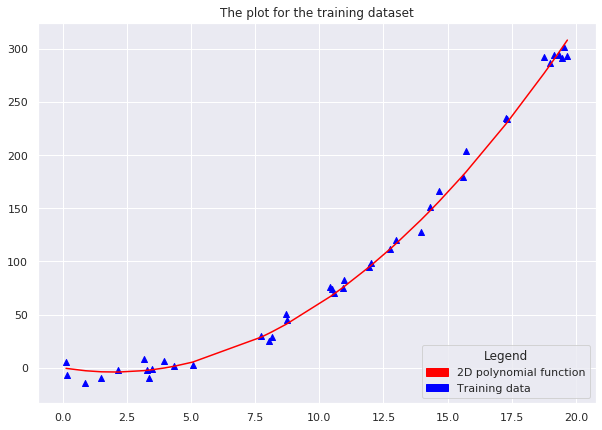

In [74]:
#fig = plt.figure(figsize=(16,9))
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('The plot for the training dataset')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting
plt.plot(new_X, new_y,color='red')
plt.scatter(X_train,y_train, marker='^',color='blue')

red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[red_patch,blue_patch],loc="lower right", title="Legend")


ax.grid(True)

plt.show()

Root Mean Squared Error :  5.2444638653520315
R2 score :  0.9976608459737603


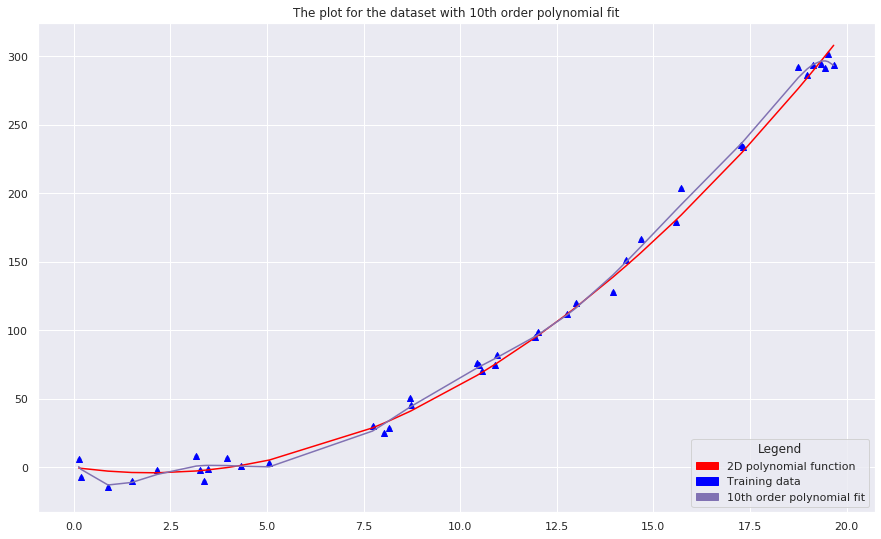

In [83]:
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)
print("Root Mean Squared Error : ",rmse)
print("R2 score : ",r2)


fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for the dataset with 10th order polynomial fit')
plt.scatter(X_train, y_train, s=10)
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)


new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting
plt.plot(new_X, new_y,color='red')
plt.scatter(X_train,y_train, marker='^',color='blue')


sorted_zip = sorted(zip(X_train,y_poly_pred))#, key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

tenthp_patch = mpatches.Patch(color='m', label='10th order polynomial fit')
red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[red_patch,blue_patch,tenthp_patch],loc="lower right", title="Legend")
ax.grid(True)
plt.show()

In [34]:
a = rng.uniform(0., 1., size)

NameError: name 'rng' is not defined

In [ ]:
https://www.jeremyjordan.me/polynomial-regression/
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
